In [1]:
import tweepy
import time
import re
import pandas as pd

In [48]:
consumer_key = "" 
consumer_secret = ""
access_token = ""
access_token_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

We will use keyword_to_csv() method to scrape tweets associated with the desired keyword(s) and save them into a csv file. First create a query method using tweepy.Cursor() method inputting our keyword as parameter. Next pull information related to twitter text from iterable object ‘tweets’ and save it in tweets_list. Then create a pandas dataframe from tweets_list. When this method is called, a csv file will be created with the scraped tweets.

In [49]:
def keyword_to_csv(keyword,recent):
    try:
        #pulls text information from tweets
        tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(recent) #creates query method
        tweets_list = [[tweet.text] for tweet in tweets] 
        #creates a pandas dataframe
        df = pd.DataFrame(tweets_list,columns=['Text']) 
        #creates a csv from data frame
        df.to_csv('{}.csv'.format(keyword), sep=',', index = False) 
    
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

In [111]:
keyword = "NFT"
keyword_f = keyword + "-filter:retweets" #excludes retweets
recent  = 3000
keyword_to_csv(keyword_f, recent)

Rate limit reached. Sleeping for: 817


In [113]:
# data cleaning
df = pd.read_csv(keyword + "-filter:retweets.csv") #loads csv file into pandas dataframe
pd.options.display.max_colwidth = 200
df.head() #prints out first few columns in a dataframe

,Text
0,@BearFriends_NFT @FrankBao_ @angrycat_nft @Omerkrvs @dorukoli @teucrypto
1,@Singer953 Gm 🌅
2,@WabiSabiNFT @SansaS_nft @usezeroio @NftHakase @SonGoku_nft @Hakase_NFTs
3,"2) Bridging \n\nArbitrum is a L2, so you need to get your ETH from mainnet onto their chain to begin. \n\nUse the NATIV… https://t.co/feiZBgDyh8"
4,"@XForceGlobal Yes, but they are taking a grip on it. Some NFT are now minted by pre-crypto companies and they may h… https://t.co/NwyvUaWFm7"


In [114]:
df.shape

(3000, 1)

In [115]:
a = df.loc[0].to_string() #loads the row from dataframe
print(a)

Text    @BearFriends_NFT @FrankBao_ @angrycat_nft @Omerkrvs @dorukoli @teucrypto


In [116]:
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
match = re.sub(regex_pattern,'',a) #replaces pattern with ''
print(match)

Text    @BearFriends_NFT @FrankBao_ @angrycat_nft @Omerkrvs @dorukoli @teucrypto


In [117]:
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
match = re.sub(pattern,'',a)
print(match)

Text    @BearFriends_NFT @FrankBao_ @angrycat_nft @Omerkrvs @dorukoli @teucrypto


In [118]:
re_list = ['@[A-Za-z0–9_]+', '#']
combined_re = re.compile( '|'.join( re_list) )
match = re.sub(combined_re,'',a)
print(match)

Text         


In [119]:
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_link_mentions = re.sub(combined_re, '', t)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [120]:
print("Cleaning the tweets...\n")
cleaned_tweets = []

for i in range(0,3000): #3000 columns in our dataframe
    try:
        if( (i+1)%100 == 0 ):
            print("Tweets {} of {} have ben processed".format(i+1,3000))                                                                  
        cleaned_tweets.append(cleaning_tweets((df.Text[i])))
    except:
        pass

Cleaning the tweets...

Tweets 100 of 3000 have ben processed
Tweets 200 of 3000 have ben processed
Tweets 300 of 3000 have ben processed
Tweets 400 of 3000 have ben processed
Tweets 500 of 3000 have ben processed
Tweets 600 of 3000 have ben processed
Tweets 700 of 3000 have ben processed
Tweets 800 of 3000 have ben processed
Tweets 900 of 3000 have ben processed
Tweets 1000 of 3000 have ben processed
Tweets 1100 of 3000 have ben processed
Tweets 1200 of 3000 have ben processed
Tweets 1300 of 3000 have ben processed
Tweets 1400 of 3000 have ben processed
Tweets 1500 of 3000 have ben processed
Tweets 1600 of 3000 have ben processed
Tweets 1700 of 3000 have ben processed
Tweets 1800 of 3000 have ben processed
Tweets 1900 of 3000 have ben processed
Tweets 2000 of 3000 have ben processed
Tweets 2100 of 3000 have ben processed
Tweets 2200 of 3000 have ben processed
Tweets 2300 of 3000 have ben processed
Tweets 2400 of 3000 have ben processed
Tweets 2500 of 3000 have ben processed
Tweets 260

In [121]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

# Generating Word Cloud

In [122]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(["https","account"]) #adding our own stopwords

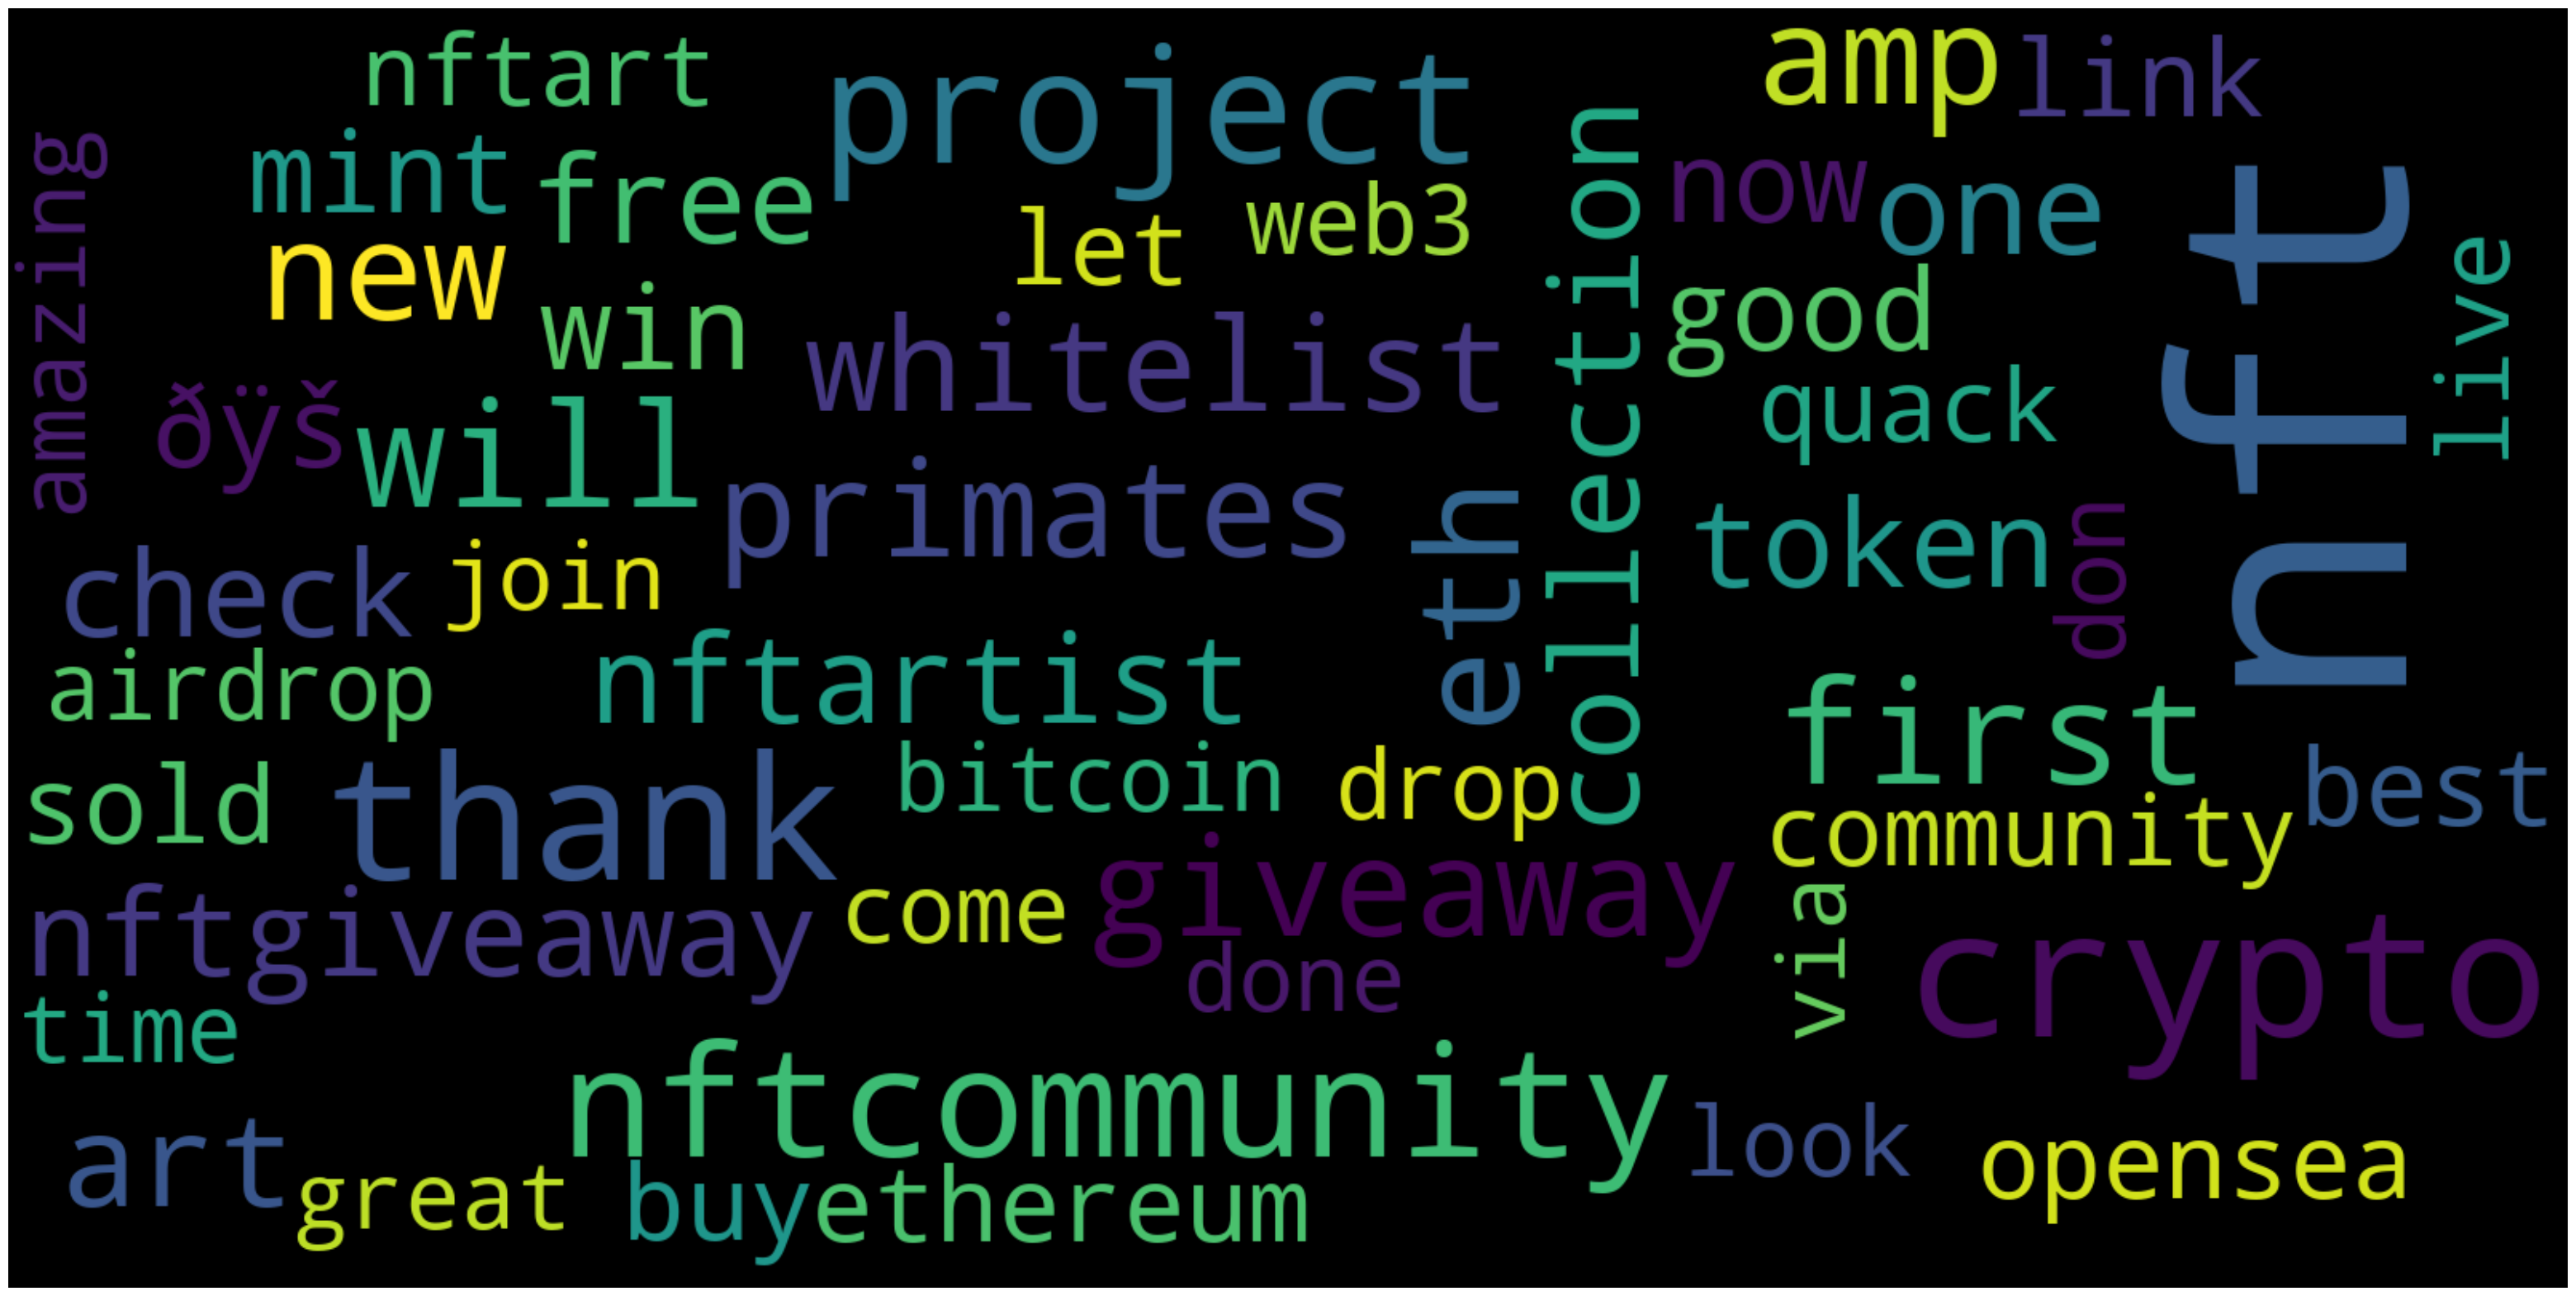

In [123]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [97]:
word_String = ",".join(list(wordcloud.words_.keys()))

In [98]:
wordcloud.layout_ # list of tuples (string, int, (int, int), int, color))

[(('otherdeed', 1.0), 200, (500, 22), None, 'rgb(94, 201, 98)'),
 (('otherside', 0.368897983045893),
  137,
  (40, 1370),
  <Transpose.ROTATE_90: 2>,
  'rgb(132, 212, 75)'),
 (('bought', 0.36509792458345514), 136, (206, 248), None, 'rgb(48, 105, 142)'),
 (('eth', 0.3279742765273312), 129, (54, 1086), None, 'rgb(72, 32, 113)'),
 (('nft', 0.28471207249342295), 120, (31, 120), None, 'rgb(41, 121, 142)'),
 (('bayc', 0.22332651271558024), 107, (1, 645), None, 'rgb(71, 16, 99)'),
 (('purchased', 0.19994153756211633),
  101,
  (664, 643),
  None,
  'rgb(38, 129, 142)'),
 (('mayc', 0.1908798596901491), 99, (183, 843), None, 'rgb(44, 114, 142)'),
 (('ape', 0.1873721134171295), 98, (181, 1110), None, 'rgb(56, 88, 140)'),
 (('metaverse', 0.17509500146156096),
  95,
  (374, 117),
  None,
  'rgb(56, 89, 140)'),
 (('weth', 0.15580239695995324), 90, (408, 836), None, 'rgb(71, 46, 124)'),
 (('sold', 0.14089447529962), 86, (452, 1109), None, 'rgb(72, 36, 117)'),
 (('whaleanalytica', 0.12335574393452207

# Custom Word Clouds

```python
import numpy as np
from PIL import Image
mask = np.array(Image.open('./your_image.jpg'))
wordcloud = WordCloud(width=1600, mask =   mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False).generate(string)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Image', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Generated Word Cloud', size=40)
plt.axis("off")
plt.show()
```

# Google API Sentiment Analysis

In [ ]:
# !pip install google-cloud-language
# !pip install google-cloud-storage

In [99]:
from google.cloud import language

def analyze_text_sentiment(text):
    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)

    response = client.analyze_sentiment(document=document)

    sentiment = response.document_sentiment
    results = dict(
        text=text,
        score=f"{sentiment.score:.1%}",
        magnitude=f"{sentiment.magnitude:.1%}",
    )
    for k, v in results.items():
        print(f"{k:10}: {v}")

In [100]:
# Credential key is needed
# export GOOGLE_APPLICATION_CREDENTIALS=~/key.json

In [110]:
# text = word_String
text = "This NFT is a scam!"
analyze_text_sentiment(text)

text      : This NFT is a scam!
score     : -80.0%
magnitude : 80.0%


In [109]:
for i in pd.Series(cleaned_tweets):
    analyze_text_sentiment(i)

text      : otherdeed for otherside 73969 sold for eth 955 previously sold for https :// cpy93zsqwo
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 73969 was purchased for eth https :// ncgmkpzvwo https :// mob7ypyugs
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 73969 with koda 1208 bought for eth opensea https :// 2j3esz73in
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 65ξ 22946 nft https :// byhr2pfosz https :// im5kf5zxux
score     : 0.0%
magnitude : 0.0%
text      : otherdeed73969 bought for eth 876 usd opensea otherside otherdeed othersideland https :// fvzwvxfmbf
score     : 0.0%
magnitude : 0.0%
text      : otherdeed73969 with koda1208 bought for eth 876 usd opensea koda otherside https :// rie4sz7rls
score     : 0.0%
magnitude : 0.0%
text      : public sale live top nft sales last hour eth azuki 5195 eth digidaigaku https :// lftxiuvfmm
score     : 20.0%
magnitude : 20.0%
text      : otherdeed for otherside 20755 sold for eth 600 previou

text      : otherdeed bought for 38ξ 3730 nft https :// wbn3dokrkv https :// bebkdxvpxb
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 88556 was purchased for weth https :// apjqwbrtmb https :// cdzc1nsxdr
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 90230 was purchased for weth https :// cy0ujiyyp1 https :// op0eorm4x5
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 78564 was purchased for weth https :// 9d8htqhxe4 https :// ui5ir4dfhy
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 64435 was purchased for weth https :// 6efkwpmopq https :// xzyqhkgwcx
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 46226 was purchased for weth https :// dyz9qfciub https :// ktlxnd6ls8
score     : 0.0%
magnitude : 0.0%
text      : 511 hey brother curious your otherdeed plot
score     : 0.0%
magnitude : 0.0%
text      : honestly not saying just https :// loibhpxmlb
score     : -50.0%
magnitude : 50.0%
text      : otherdeed bought for 86ξ 2914 nft https :// 5h

text      : otherdeed 21776 was purchased for weth https :// oi0cwjfa9q https :// denwiylnzg
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 68ξ 2653 nft https :// bqdbqma0j3 https :// xbwwfvvjlq
score     : 0.0%
magnitude : 0.0%
text      : aapearmy bapnation looking buy otherdeed this weekend anyone community has advice needs https :// muj6szbtpo
score     : -10.0%
magnitude : 10.0%
text      : otherdeed 70944 bought for 89ξ 985 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// j65v6y5raf
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 70944 was purchased for eth https :// qms93q8o2f https :// 6zojme6o2q
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 89ξ 2985 nft https :// hgtb1trqn1 https :// n4xoz6qyol
score     : 0.0%
magnitude : 0.0%
text      : new loan started otherdeed for otherside 78197 loan weth repayment 480822 weth duration days https :// ikprvqu216
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 72

text      : top nfts global value otherdeed 203 601 kusd cryptopunks 734 https :// sxe0rt04gy
score     : 60.0%
magnitude : 60.0%
text      : addition pitch deck the otherdeed contract https :// lvf0cep0o1
score     : 0.0%
magnitude : 0.0%
text      : want otherdeed
score     : -20.0%
magnitude : 20.0%
text      : otherdeed for otherside 51830 sold for eth 095 previously sold for https :// zfqtxxzmix
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 51830 bought for 49ξ 110 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// j97r3eavgi
score     : 0.0%
magnitude : 0.0%
text      : nftcommunity otherdeed 51830 nft was purchased for eth 104 link https :// p6csun344o https :// q6ljmyxiu5
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 51830 with koda 9509 bought for eth opensea https :// uvu9qomuc9
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 49ξ 26110 nft https :// bpaj5aqout https :// k9i24z4e49
score     : 0.0%
magnitude : 0.0%
text 

text      : otherdeed bought for 88ξ 3029 nft https :// fhrbihv3wd https :// oflrkkijwd
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 58940 bought for weth 820 otherside otherdeed bayc mayc ape metaverse https :// oj6ydbeeim
score     : 0.0%
magnitude : 0.0%
text      : new nft market statistics top nft collections 24hrs sales volume eth sept 2nd 2022 otherdeed for https :// xzz7c7jsnv
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 99730 sold for eth 833 previously sold for eth https :// rwlt7txqkq
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 75ξ 2820 nft https :// rlf50va1ht https :// ozozxnb4ys
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 58940 was purchased for weth https :// hxo8yb0z8r https :// u2mmdqvdhj
score     : 0.0%
magnitude : 0.0%
text      : viu novo teaser metaverso otherdeed
score     : 30.0%
magnitude : 30.0%
text      : install the bitski ios app for free daily nft giveaways clone otherdeed hapebeast me

text      : otherdeed 51927 bought for 85ξ 023 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// rjvttzkcsl
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 64495 bought for 82ξ 974 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// jutkttgfdm
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 58156 was purchased for eth https :// yneetmkoba https :// zlcfsoxcnx
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 51927 was purchased for eth https :// ljnhl4s0vu https :// efpwxvurni
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 85ξ 3023 nft https :// ahjdidyyzp https :// swrlq88hnt
score     : 0.0%
magnitude : 0.0%
text      : opinion otherdeed trailer gamers hate nfts but especially detest apes yuga should https :// u5cwbzpgnj
score     : -40.0%
magnitude : 40.0%
text      : otherdeed 64495 was purchased for eth https :// zvdam8xt85 https :// fzsllrkmsl
score     : 0.0%
magnitude : 0.0%
text      : these sales cl

text      : sale 115 above floor otherdeed for otherside 62610 sold for eth 146 otherdeed for otherside floor https :// pzdiizyrva
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 13158 bought for 07ξ 119 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// 3yaausimue
score     : 0.0%
magnitude : 0.0%
text      : nft whale trade transfer norcalguy eth 0x945dae nft otherdeed for otherside 13158 https :// svtuzhtmgi
score     : 0.0%
magnitude : 0.0%
text      : nftcommunity otherdeed 13158 nft was purchased for eth 112 link https :// ccs3drjawp https :// segdu81ux3
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 13158 with koda 5483 bought for 069 eth opensea https :// yquqvhxgvi
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 13158 sold for eth 295 previously sold for https :// s1ebmj10dz
score     : 0.0%
magnitude : 0.0%
text      : new big nft sale otherdeed for otherside 13158 bought for ξ24 069eth 072 floor price ξ0eth https :// v

text      : otherdeed otherside slightly following last night teaser video https :// avcckmn0vn
score     : 0.0%
magnitude : 0.0%
text      : friday and gwei was under swept more reveal days and otherdeed for otherside https :// rj0dfnvnnj
score     : -40.0%
magnitude : 40.0%
text      : top trending nft collections last hours digidaigaku https :// 81pn0my8ex
score     : 70.0%
magnitude : 70.0%
text      : install the bitski ios app for free daily nft giveaways clone otherdeed hapebeast meebits and more are for https :// s3ag2kfbza
score     : -20.0%
magnitude : 20.0%
text      : thinking getting otherdeed can anyone give good reason buy not buy one
score     : -70.0%
magnitude : 70.0%
text      : otherdeed for otherside 794 sold for eth 755 previously sold for eth https :// olydlzqdiq
score     : 0.0%
magnitude : 0.0%
text      : 個人的にotherdeedも保有しているし これからトレンドきそうなメタバースの土地を買っておいて そこにcatrescueのホルダーの居場所を作っていくのも楽しそうだよね ❤️‍
score     : 90.0%
magnitude : 90.0%
text      : nft time otherdeed

text      : otherdeed bought for 2861 nft https :// o9dt1ybmok https :// nad5rytji4
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 91269 bought for 78ξ 840 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// ehnyevqtmv
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 46270 bought for 78ξ 840 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// 6vj29j3u53
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 91269 sold for eth 839 previously sold for eth https :// 2ihnvzgffc
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 46270 sold for eth 839 previously sold for eth https :// vnmol8ksec
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 78ξ 0x34d85c9cdeb23fa97cb08333b511ac86e1c4e258 bayc buy sell mayc buy https :// ejfj80jori
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 91269 was purchased for eth https :// 5by26qbkqu https :// rl5jjz7ehy
score     : 0.0%
magnitude : 0.0%
text      :

text      : otherdeed 78ξ 0x34d85c9cdeb23fa97cb08333b511ac86e1c4e258 clonex buy sell mayc buy https :// l9qowxzzfr
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 67673 bought for 020 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// nsug8pgw67
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 67673 was purchased for eth https :// qw7iolvnn1 https :// hjtptewnbr
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 898ξ 3020 nft https :// 61yd33cpws https :// v9sinydpzh
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 88473 bought for 84ξ 920 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// krnvlosbcr
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 88473 was purchased for eth https :// txfo371fwb https :// dkiwagongx
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 835ξ 2920 nft https :// ubkbx7vm49 https :// a3vbcxu42k
score     : 0.0%
magnitude : 0.0%
text      : public sale live top nf

text      : ... eth digidaigaku 1760 eva eth azuki 2874 eth rtfkt nike air force murakami dna https :// lil2fz1l01
score     : 10.0%
magnitude : 10.0%
text      : public sale live top nft sales last hour eth chromie squiggle 3414 eth https :// c5vlljuxle
score     : 20.0%
magnitude : 20.0%
text      : otherdeed 17072 was purchased for eth https :// 2easxxuyzi https :// 455jhyckpz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed17072 bought for eth 332 usd x2y2 otherside otherdeed othersideland https :// v4zslr1dfx
score     : 0.0%
magnitude : 0.0%
text      : otherdeed17072 with koda3143 bought for eth 332 usd x2y2 koda otherside https :// 7bokemrywq
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 17072 sold for eth 391 previously sold for https :// bq8cneypsq
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 67866 was purchased for eth https :// oziccm3mz9 https :// fssto7wnot
score     : 0.0%
magnitude : 0.0%
text      : top whale sales last the vis

text      : otherdeed85954 bought for eth 980 usd opensea otherside otherdeed othersideland https :// 5xfypcmmt7
score     : 0.0%
magnitude : 0.0%
text      : otherdeed85954 with koda989 bought for eth 980 usd opensea koda otherside https :// qdj1z0xa8a
score     : 0.0%
magnitude : 0.0%
text      : sale 843 above floor otherdeed for otherside 85954 sold for eth 944 otherdeed for otherside floor https :// 7x317vypci
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 71461 bought for 75ξ 760 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// f5gbf4vnvb
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 48806 bought for weth 594 otherside otherdeed bayc mayc ape metaverse https :// yiijzvwmxk
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 15088 bought for 605 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// gvs8odlv8a
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 71461 was purchased for eth https :// v0ysptozur https :// 8

text      : otherdeed 16138 was purchased for eth https :// a0opfwawtd https :// hqqf1mrhxb
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 17ξ 26983 nft https :// mfvkcyjf1m https :// 2ldomnsj0w
score     : 0.0%
magnitude : 0.0%
text      : sale 894 above floor otherdeed for otherside 16138 sold for eth 996 otherdeed for otherside floor https :// ruasi46mwo
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 94511 bought for weth 650 otherside otherdeed bayc mayc ape metaverse https :// g71jbshsig
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 94511 was purchased for weth https :// fpazl0jyps https :// aegda54gxz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 6701ξ 2650 nft https :// xotylcvr5v https :// zccpqofjhb
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 78028 bought for weth 599 otherside otherdeed bayc mayc ape metaverse https :// bxkp5sptjy
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 78028 was purchased

text      : otherdeed 69021 was purchased for eth https :// xvzs0tcdul https :// cirj2sbo1v
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 47357 bought for weth 113 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// 8zywvlooxq
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 0001ξ 3113 nft https :// a4j6ggmw08 https :// hrmbvxeafs
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 47357 was purchased for weth https :// 6sw2gh00np https :// 6p8rpk7xxs
score     : 0.0%
magnitude : 0.0%
text      : buying nfts after the otherdeed sale even though knew that was the literal top
score     : 40.0%
magnitude : 40.0%
text      : don like making predictions but seems the most obvious play seen since moonbirds otherde https :// avkglqntyj
score     : -40.0%
magnitude : 40.0%
text      : draw for the otherdeed happening tonight still time enter mint parrot free parrots remaining joi https :// 56soubb4qr
score     : 10.0%
magnitude : 10.0%
text     

text      : otherdeed bought for 6431ξ 2562 nft https :// q5f2fhjfaj https :// xuw32kxt89
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 60693 was purchased for weth https :// ztuvzzatpw https :// z2iqn5og8i
score     : 0.0%
magnitude : 0.0%
text      : but the offer isnt valid and they are stuck with the overpriced otherdeed that they bought https :// cujrk7orkx
score     : -80.0%
magnitude : 80.0%
text      : sale above floor otherdeed for otherside 9472 sold for eth 453 otherdeed for otherside floor https :// aqjhuwvihe
score     : 0.0%
magnitude : 0.0%
text      : the great burn coming end tomorrow the deadline and afterwards have the tournament https :// qihknroo38
score     : 50.0%
magnitude : 50.0%
text      : was the same thing with otherdeed whitelisted wallets ... people were selling the https :// lrtjhx0x25
score     : -30.0%
magnitude : 30.0%
text      : literally giving away otherdeed discord just next day the sale ... sold out project amazing https :// ab5kkyb3dk

text      : otherdeed 50064 bought for 77ξ 758 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// xaxck9oia5
score     : 0.0%
magnitude : 0.0%
text      : top collections moonbirds oddities ξ868 cryptosimeji ξ727 bayc ξ675 clonex ξ579 digida https :// rvfwo39szm
score     : 70.0%
magnitude : 70.0%
text      : otherdeed for otherside 82647 sold for eth 869 previously sold for eth https :// m0tspvgjer
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 56745 bought for weth 603 otherside otherdeed bayc mayc ape metaverse https :// tl79adotmq
score     : 0.0%
magnitude : 0.0%
text      : otherdeed nft bayc supera volumen ventas top shot nba alcanza los 000 millones dólares https :// 8843tjci95
score     : 30.0%
magnitude : 30.0%
text      : otherdeed for otherside 86272 sold for eth 672 previously sold for eth https :// socsczgh6v
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 47426 sold for eth 041 previously sold for eth https :// v6kkqhzemy


text      : bayc otherdeed nft surpasses nba top shot sales volume hitting within four months launch https :// fwx7tfbkkh
score     : 40.0%
magnitude : 40.0%
text      : otherdeed 55038 was purchased for eth https :// foqrjd7lkb https :// e43nfsahg8
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 80877 bought for weth 029 otherside otherdeed bayc mayc ape metaverse https :// lvjl1r1sqe
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 76ξ 2732 nft https :// icidmg0f1w https :// q8hksi9b92
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 88289 bought for 75ξ 729 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// y4ym2qgeoi
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 50064 bought for 77ξ 758 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// 4lo8iexdvg
score     : 0.0%
magnitude : 0.0%
text      : top collections moonbirds oddities ξ868 cryptosimeji ξ727 bayc ξ675 clonex ξ579 digida https :// ggpg5anpcx
score

text      : otherdeed bought for 3275 nft https :// af4i362rz6 https :// ktnhosonka
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 21338 was purchased for eth https :// 22ygqhstl2 https :// 1iz2xytjdi
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 21338 was purchased for weth https :// 22ygqhstl2 https :// g3o1pjoexn
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 15ξ 3353 nft https :// jukctgto6h https :// us4sbuumev
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 98963 was purchased for eth https :// kcjsacik5k https :// ffpveqqugi
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 12407 bought for weth 108 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// chnv8ajqj8
score     : 0.0%
magnitude : 0.0%
text      : bayc otherdeed nft surpasses nba top shot sales volume hitting within four months launch https :// nrbyddetl1
score     : 40.0%
magnitude : 40.0%
text      : otherdeed 59983 bought for weth 224 otherside oth

text      : otherdeed 6080 bought for weth 621 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// yrksjlnhh0
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 56745 bought for weth 603 otherside otherdeed bayc mayc ape metaverse https :// fzq30k1ja5
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 667ξ 2603 nft https :// s8adesvpz0 https :// l8iipw4mgy
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 5621 nft https :// ttqonxobu5 https :// 8iwnwkb8vr
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 56745 was purchased for weth https :// dulrhd6ccm https :// 28g6jrwgzv
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 6080 was purchased for weth https :// 44medhfom2 https :// vevuo96kck
score     : 0.0%
magnitude : 0.0%
text      : install the bitski ios app for free daily nft giveaways clone otherdeed hapebeast meebits and more are for https :// p1gwvd7p9c
score     : -20.0%
magnitude : 20.0%
text      : you own a

text      : otherdeed 56745 bought for weth 100 otherside otherdeed bayc mayc ape metaverse https :// aei0jmouub
score     : 0.0%
magnitude : 0.0%
text      : welcome home otherdeed for otherside 68083 for the 8th time ... over the last days from this single nft https :// mjpinli9dx
score     : 0.0%
magnitude : 0.0%
text      : well floor priced otherdeed with special properties was bought eth then shortly was sold !!! lol
score     : 10.0%
magnitude : 30.0%
text      : nft whale trade transfer 0xa93c23 0xb3aa99 nft otherdeed for otherside 49986 https :// ai6xtu9qlk
score     : 0.0%
magnitude : 0.0%
text      : fat fingered otherdeed with koda and bought the very common one below for 000
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 49986 was purchased for weth https :// tss95rf2tz https :// kbq7eo0kzb
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 655ξ 2600 nft https :// jvugzvzn3o https :// bai0rr476i
score     : 0.0%
magnitude : 0.0%
text      : otherde

text      : ens and otherdeed are the two collections that are too large for bots monitor especially https :// ifhshqhdqj
score     : -60.0%
magnitude : 60.0%
text      : you see 100 weth offer otherdeed land listed for eth don victim
score     : -20.0%
magnitude : 20.0%
text      : nft otherdeed surpassed nba top shot terms sales https :// g6p07za7pp
score     : 50.0%
magnitude : 50.0%
text      : nft otherdeed surpasses nba top shot terms sales https :// yabrfvqsqh
score     : 40.0%
magnitude : 40.0%
text      : nft otherdeed surpasses nba top shot terms sales https :// 6anfw4lgji
score     : 40.0%
magnitude : 40.0%
text      : the top placements the weirdosversusscaries tournament will receive prizes ranging from otherdeed https :// weftqm7lmd
score     : 20.0%
magnitude : 20.0%
text      : does your project this ??? that annually earned the floor price otherdeed check out https :// yb1p76zn35
score     : -20.0%
magnitude : 20.0%
text      : otherdeed going into the forge today and 

text      : otherdeed 74670 was purchased for eth https :// uaxykk9t6q https :// 4auozs0cs0
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 13315 was purchased for weth https :// qhkewdbbfa https :// 81tsuhxdgf
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 94698 was purchased for eth https :// uyqvmyzmh9 https :// 19w3ftq5zi
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 28955 was purchased for eth https :// 5uuwowg5iz https :// 66kieisbhx
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 18793 was purchased for eth https :// n4rqcxgd9f https :// r8bvpqawhb
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 9616 was purchased for eth https :// u1wq2kql4j https :// zl4pwyqxuw
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 83163 was purchased for eth https :// srxl3gr7f4 https :// 87kpexsgku
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 89010 was purchased for weth https :// 3avgo8sc2a https :// r7r8sfzxv0
score     : 0.0%
magnitud

text      : hey bud trying find someone that can afford what have found otherdeed number 27238 listed https :// nbj2erclbq
score     : -10.0%
magnitude : 10.0%
text      : otherdeed 58895 bought for 25ξ polygon otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// g9yjcub2fu
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 92724 bought for 69ξ polygon otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// izuh7ykexs
score     : 0.0%
magnitude : 0.0%
text      : found otherdeed for eth while looking noticed there eth offer that the owner https :// h1zqhtuice
score     : 20.0%
magnitude : 20.0%
text      : nft whale trade transfer koolcaleb eth 0xb3aa99 nft otherdeed for otherside 92724 https :// 3z2afm7v0r
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for nanξ nan nft https :// wqm1o0ypyk https :// oj0z7zkumx
score     : 0.0%
magnitude : 0.0%
text      : hey bud found otherdeed for sale for eth but you look hasan offer eth https :// x

text      : otherdeed 94698 bought for 77ξ polygon otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// vtjyuqhxk2
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 13315 bought for 96ξ polygon otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// dqgtrcu7vl
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 74670 bought for 29ξ polygon otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// lazggpad4x
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 13315 sold for weth 140 previously sold for eth https :// xfdij6untb
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 74670 sold for eth 679 previously sold for eth https :// ggetkfivke
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 77ξ 0x34d85c9cdeb23fa97cb08333b511ac86e1c4e258 bayc buy sell wow buy sell
score     : 70.0%
magnitude : 70.0%
text      : otherdeed bought for nanξ nan nft https :// n5uajqlkiw https :// zjukiphil9
score   

text      : baycの otherside metaverse この土地にあたるnftの otherdeed の累計売上高が約10億3500万を超えた 期待感だけでこれだけのお金を動かすのはすごいことです https :// j6pcriyj4e
score     : 20.0%
magnitude : 20.0%
text      : nft time otherdeed for otherside one day volume 255 eth otherdeed opensea https :// plq5mly5eo
score     : 0.0%
magnitude : 0.0%
text      : bayc otherdeed nft surpasses nba top shot sales volume hitting within four months launch beincrypto https :// ohhwl0ychy
score     : 40.0%
magnitude : 40.0%
text      : daily top nft discord members gfc genesis gear colle ... 541 bxh the foolish child 411 kuma https :// j2l1sx4and
score     : -30.0%
magnitude : 100.0%
text      : otherdeed for otherside 96130 may have been stolen tokens worth from 0x700d8a76b37f672a06ab89fe1 https :// ycdhifwvyw
score     : -40.0%
magnitude : 40.0%
text      : bayc otherdeed nft generated approximately 037 billion all time sales volume within months launch thi https :// u5ueiy0prd
score     : 0.0%
magnitude : 0.0%
text      : bayc otherdee

text      : bayc otherdeed nft surpasses nba top shot sales volume hitting within four months launch beincrypto https :// trxfqsn4zy
score     : 40.0%
magnitude : 40.0%
text      : bayc otherdeed nft surpasses nba top shot sales volume hitting within four months launch https :// qyqmymilrx
score     : 40.0%
magnitude : 40.0%
text      : bayc otherdeed nft surpasses nba top shot sales volume hitting within four months launch bitcoin https :// stpqyvjyav
score     : 30.0%
magnitude : 30.0%
text      : install the bitski ios app for free daily nft giveaways clone otherdeed hapebeast meebits and more are for https :// toowq8fosc
score     : -20.0%
magnitude : 20.0%
text      : otherdeed 92358 was purchased for weth https :// nywv3aazet https :// jj8etysban
score     : 0.0%
magnitude : 0.0%
text      : bayc otherdeed nft surpasses nba top shot sales volume hitting within four months launch https :// hli42lw2e3
score     : 40.0%
magnitude : 40.0%
text      : bayc otherdeed nft surpasses nba 

text      : otherdeed 79569 was purchased for weth https :// jet3xb6jpx https :// yzoapds69q
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 79569 bought for weth 871 otherside otherdeed bayc mayc ape metaverse https :// tekkyivvbk
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 73126 bought for weth 495 otherside otherdeed bayc mayc ape metaverse https :// iari23wxo4
score     : 0.0%
magnitude : 0.0%
text      : bought otherdeed ens numbers just fucking around far have more gains that than the deeds
score     : -70.0%
magnitude : 70.0%
text      : otherdeed 97397 bought for 65ξ 728 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// 5jr4qhdj7p
score     : 0.0%
magnitude : 0.0%
text      : someone just gave 50k loan for otherdeed that seems pretty average days the floor eth https :// rocjcncwvp
score     : -10.0%
magnitude : 10.0%
text      : otherdeed bought for 65ξ 3728 nft https :// e7bah4ds1k https :// eny7mmpize
score     : 0.0%
magnitude : 0.0%
te

text      : otherdeed bought for 89ξ 5472 nft https :// pgksqfnjh4 https :// fhc5rrvby4
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 50393 was purchased for eth https :// cstgpwvehh https :// u89jydavap
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 50393 bought for 89ξ 472 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// n4hagortg2
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 63716 bought for weth 850 otherside otherdeed bayc mayc ape metaverse https :// rtc5yqmgok
score     : 0.0%
magnitude : 0.0%
text      : sale 116 above floor otherdeed for otherside 50393 sold for eth 805 otherdeed for otherside floor https :// vu4jeam1cu
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 63716 was purchased for weth https :// yphuss3kgd https :// vnepewkw0a
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 13ξ 18850 nft https :// yxcgswlmbz https :// 88oulg6s1o
score     : 0.0%
magnitude : 0.0%
text      : otherdeed63716 bo

text      : otherdeed 59304 bought for 673 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// umovvkt93g
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 78289 bought for 673 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// zzqtpg7tce
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 90871 bought for 673 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// 3h7u2ozned
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 65297 bought for 89ξ 659 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// 2kj6lelngx
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 54891 bought for 88ξ 644 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// e2fwxpn5vm
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 83563 bought for 88ξ 644 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// ktpicjus4z
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 93ξ 2715 nft 

text      : otherdeed 51022 was purchased for eth https :// hd662aya38 https :// hhabdpnrt3
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 64083 was purchased for eth https :// xo0hxnrfme https :// 7oqkwyel2x
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 66688 was purchased for eth https :// mz5hvmlvne https :// napwxspzbp
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 78ξ 2504 nft https :// ot0tuwgfs1 https :// kisochaciu
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 79ξ 2518 nft https :// zpardqjqbx https :// ivooq6jh2l
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 77ξ 2490 nft https :// i4r6r5e4go https :// gmjselidtv
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 47623 bought for 78ξ 500 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// djqqmirrgj
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 57682 bought for 77ξ 483 otherside otherdeed bayc mayc ape metaverse whal

text      : otherdeed 66902 bought for 813 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// j20hgvstyg
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 5627 nft https :// hr5zeqnwfp https :// lk0morrut0
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 74299 was purchased for eth https :// rk07pcmnb5 https :// ihuabso0mg
score     : 0.0%
magnitude : 0.0%
text      : sale 130 above floor otherdeed for otherside 74299 sold for eth 337 otherdeed for otherside floor https :// itlljyqlbc
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 95705 was purchased for eth https :// pp3xxkfh0w https :// p6t3rpaavs
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 2813 nft https :// izrgshdcc3 https :// u9powqzysg
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 66902 was purchased for eth https :// gqrlcdczpf https :// 67hpfvz2ge
score     : 0.0%
magnitude : 0.0%
text      : bored ape yacht club bayc flips cryptopunks nft all 

text      : otherdeed 93842 was purchased for eth https :// 2ygzkqlv7q https :// rbnu3wotpq
score     : 0.0%
magnitude : 0.0%
text      : otherdeed93842 bought for eth 486 usd opensea otherside otherdeed othersideland https :// 1cvzmmkjab
score     : 0.0%
magnitude : 0.0%
text      : otherdeed93842 with koda2621 bought for eth 486 usd opensea koda otherside https :// zcnt4ut4uf
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 18ξ 25324 nft https :// p0osiwli6o https :// arss3obun2
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 6853 bought for 034 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// 8tvxwfmbaz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 7034 nft https :// cp10qmtnrt https :// xwra9twbl0
score     : 0.0%
magnitude : 0.0%
text      : otherdeed6853 bought for eth 899 usd opensea otherside otherdeed othersideland https :// 4yw7khct6j
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 6853 was purchased f

text      : nft whale trade transfer 0xba9ae1 n0b0dy eth nft otherdeed for otherside 49960 https :// x9ub6khusz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 49960 was purchased for eth https :// ws7gezham5 https :// 5yds23s1um
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 4220 nft https :// hfciwuv2w9 https :// lb1lx5xvbw
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 74655 bought for 532 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// 9zgiznsuan
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 2532 nft https :// oy9wmzqdqj https :// fkbry5u4f3
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 74655 was purchased for eth https :// pfhvnmifmx https :// rbpii3to8p
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 78693 bought for weth 410 otherside otherdeed bayc mayc ape metaverse https :// 4rtccj6fyn
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 50984 sold for eth 704 pre

text      : otherdeed 50820 was purchased for weth https :// kdhqucbd05 https :// yt0jxubhjz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 7125ξ 2483 nft https :// jx1lqcnijm https :// nouumg19u8
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 95ξ 2743 nft https :// usktmddiax https :// akioad2yof
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 88530 was purchased for weth https :// lnepxzjg8s https :// ztpnuqtkxi
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 47935 bought for 673 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// u1tmwkc2mn
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 7323 sold for eth 983 previously sold for nft https :// sjwtvqrog8
score     : 0.0%
magnitude : 0.0%
text      : free land from overline this poised the next decentraland otherdeed sandbox grab them for free now https :// avqltb3i7o
score     : 10.0%
magnitude : 10.0%
text      : you own any otherdeed bayc

text      : sale 214 above floor otherdeed for otherside 97456 sold for eth 450 otherdeed for otherside floor https :// mhy3bkahca
score     : 0.0%
magnitude : 0.0%
text      : top nft trending collections eth sandbox lands boredapeyachtclub otherdeed mutantapeyachtclub https :// axo471dzm5
score     : 80.0%
magnitude : 80.0%
text      : otherdeed 78954 bought for 84ξ 588 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// defl2xvqim
score     : 0.0%
magnitude : 0.0%
text      : was even better than yoga labs animation otherdeed ngl hats off efforts the https :// bjwesvlntv
score     : 90.0%
magnitude : 90.0%
text      : overlapping communities art blocks otherdeed webaverse you like see more hard find nft ins https :// hedgduxtr5
score     : -10.0%
magnitude : 10.0%
text      : otherdeed 78954 was purchased for eth https :// ape2qmqsml https :// hogx1lzeb2
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 84ξ 2588 nft https :// 3v0pc2gdtj https :// ah

text      : otherdeed bought for 833ξ 2578 nft https :// glni9dxsux https :// vszhxttipm
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 97229 was purchased for weth https :// wegxwiodxy https :// veatmtratn
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 97229 was purchased for eth https :// yzswukdulw https :// xv0nbon5hm
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 181ξ 254 nft https :// vfimbiyjyu https :// vipfhk3w9y
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 65325 was purchased for weth https :// g5mtoy5n4c https :// z3psagvptd
score     : 0.0%
magnitude : 0.0%
text      : real time charts for otherdeed for otherside follow for exclusive updates the top nft collections live https :// 2xd1oaotpp
score     : 60.0%
magnitude : 60.0%
text      : otherdeed 97822 bought for 28ξ 614 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// bneoyaxw6h
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 97821 bought for 96ξ

text      : yuga labs元宇宙项目otherside上地块otherdeed 77336 nft以99枚以太坊 约14 3万美元 的价格成交 该枚nft于今年5月1日首次出售 售价为5 3eth btc bnb eth https :// 0nbgrfylhz
score     : 0.0%
magnitude : 0.0%
text      : yuga labs元宇宙プロジェクトotherside上のブロックotherdeed77336 nftは99枚のイーサリアム 約14 3万ドル で成約し このnftは今年5月1日に初めて販売され 価格は5 ethだった https :// xgrd0bxsas
score     : 0.0%
magnitude : 0.0%
text      : yuga labs 元宇宙项目 otherside 上地块 otherdeed 77336 nft 枚以太坊 万美元 的价格成交 nft 于今年 日首次出售 售价为 eth https :// ckr6wa3a8j
score     : -10.0%
magnitude : 10.0%
text      : what this new party just got its first contribution new money otherdeed for otherside created 0x1f889 https :// 2hahmrjvbn
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 66407 bought for weth 400 otherside otherdeed bayc mayc ape metaverse https :// w82jlsivio
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 10619 bought for 924 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// c7bms8vm4n
score     : 0.0%
magnitude : 0.0%
text      : how you

text      : otherdeed for otherside 58994 sold for eth 889 previously sold for nft https :// cmnw3pzt1o
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 58994 was purchased for eth https :// 4fdm8eo0w7 https :// edhd0bp92h
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 99ξ 2799 nft https :// n64cnmfqlu https :// 5tfek3uxne
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside nfts nftproject nftshilling nftartists nftcommumity nftcollectors https :// 3fp9vchoqb
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 28426 bought for weth 414 otherside otherdeed bayc mayc ape metaverse https :// nwbncexvkj
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 28426 was purchased for weth https :// dord135i6x https :// hvpkv1akmz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 665ξ 2414 nft https :// yc62monbj9 https :// dy5kgxbj4v
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 97276 bought for weth 409 otherside ot

text      : otherdeed bought for 662ξ 2338 nft https :// 3ffwj9ryik https :// sdsqyyagzi
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 22681 bought for weth 338 otherside otherdeed bayc mayc ape metaverse https :// lelcfgyyy4
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 22681 was purchased for weth https :// eajkxjzv23 https :// 2rsx9sabk7
score     : 0.0%
magnitude : 0.0%
text      : real time charts for otherdeed for otherside follow for exclusive updates the top nft collections live https :// aj4ddppuva
score     : 60.0%
magnitude : 60.0%
text      : amp killed today let this tweet reminder that their otherworldly performance https :// uoshnbmpor
score     : -60.0%
magnitude : 60.0%
text      : new big nft sale otherdeed for otherside 62195 bought for ξ15 87eth 717 floor price ξ0eth https :// 4zqrumxcvq
score     : 0.0%
magnitude : 0.0%
text      : daily top nft discord members bxh the foolish child 384 satoshi island land ... 355 mogul https :// 9jfkcaiv24
scor

text      : nft whale trade transfer 0x828fa8 ryan_main nft otherdeed for otherside 65986 https :// 0pvoqnlm3n
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 65986 was purchased for eth https :// 5yc6yycq1w https :// tavm1a5bqy
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 58179 bought for 79ξ 518 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// mqgqozmvnm
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 58179 was purchased for eth https :// 0rakflesez https :// dawx2ox7wz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 79ξ 2518 nft https :// d6vyac3auz https :// 9xqgxqiv00
score     : 0.0%
magnitude : 0.0%
text      : nft whale trade transfer 0xb06e38 n0b0dy eth nft otherdeed for otherside 77336 https :// qtj8m5dd83
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 77336 bought for 99ξ 139 284 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// 8mhmgc1fwn
score     : 0.0%
magnitude : 0.0%
text     

text      : collection otherdeed for otherside day sales 589 total sales 44447 otherdeed opensea
score     : 0.0%
magnitude : 0.0%
text      : sold for eth 22327 otherdeed for otherside otherdeed nft highnetworth whales opensea https :// noivjcnlpi
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 87ξ 22327 nft https :// g4kh5g3cgx https :// yzny8v30gg
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 62195 was purchased for eth https :// uzfeevqu1g https :// kmwgh6bjpa
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 62195 with koda 8999 bought for eth opensea https :// koojsn47qz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed62195 bought for eth 549 usd opensea otherside otherdeed othersideland https :// 3hjhvxj7vx
score     : 0.0%
magnitude : 0.0%
text      : otherdeed62195 with koda8999 bought for eth 549 usd opensea koda otherside https :// p9f7mdvjvr
score     : 0.0%
magnitude : 0.0%
text      : sale 807 above floor otherdeed for otherside 6

text      : otherdeed for otherside 90970 sold for eth 189 previously sold for https :// ksu9onx1lr
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 90970 with koda 4118 bought for eth opensea https :// wx0gfhdfcu
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 90970 was purchased for eth https :// ykwaqxjyt9 https :// rymhwbftqj
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 58ξ 19105 nft https :// 30lhog3shn https :// tgbmcdok9e
score     : 0.0%
magnitude : 0.0%
text      : otherdeed90970 bought for eth 216 usd opensea otherside otherdeed othersideland https :// tovkwedewo
score     : 0.0%
magnitude : 0.0%
text      : otherdeed90970 with koda4118 bought for eth 216 usd opensea koda otherside https :// slgtvubfkx
score     : 0.0%
magnitude : 0.0%
text      : sale 676 above floor otherdeed for otherside 90970 sold for eth 227 otherdeed for otherside floo https :// 7ijt37asqk
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 65106 was purchased f

text      : otherdeed 13451 bought for weth 377 otherside otherdeed bayc mayc ape metaverse https :// fak8wlg9nf
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 13451 was purchased for weth https :// ifozx6rzsq https :// g0wfvbqexh
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 69ξ 2377 nft https :// qxref6bboo https :// kfbqxywcpy
score     : 0.0%
magnitude : 0.0%
text      : digits will flip bayc digits will flip mayc digits will flip otherdeed and least this this will https :// dd5xw2np4u
score     : -30.0%
magnitude : 30.0%
text      : otherdeed 19107 was purchased for weth https :// f4izwn7ljo https :// grsjrv6bjt
score     : 0.0%
magnitude : 0.0%
text      : current top nft projects 80e art blocks curated ens 01e otherdeed for https :// qat0gdiwkw
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 80041 bought for weth 337 otherside otherdeed bayc mayc ape metaverse https :// qrvui6s5wq
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 57900

text      : otherdeed for otherside 52680 sold for eth 497 previously sold for https :// 8ad4mz1g5z
score     : 0.0%
magnitude : 0.0%
text      : sold for eth 19837 otherdeed for otherside otherdeed nft highnetworth whales opensea https :// f2hnsj9umg
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 52315 sold for eth 679 previously sold for https :// ypiz8qqt7o
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 56871 sold for eth 679 previously sold for https :// f6a1ef0ole
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 13300 sold for eth 827 previously sold for https :// 8zcgbfcy3m
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 90763 sold for eth 417 previously sold for https :// rxkju3vmqa
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 91879 sold for eth 417 previously sold for https :// 6isjy5vyxa
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 68332 so

text      : otherdeed for otherside 74974 sold for eth 807 previously sold for eth https :// bwnwhsyzo5
score     : 0.0%
magnitude : 0.0%
text      : what this new party just got its first contribution central land knight otherdeed for otherside created https :// r1zgtab1nu
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 74974 bought for 89ξ 659 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// vvspqar2vz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 74974 was purchased for eth https :// gwjv5oyoal https :// nfi26tbrry
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 89ξ 2659 nft https :// vfd4c05bsa https :// afopunhusn
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 22675 was purchased for weth https :// gx2tujoery https :// xlhdrui3yr
score     : 0.0%
magnitude : 0.0%
text      : what this new party just got its first contribution apeparty otherdeed for otherside created vrvr eth https :// gkucalrt8v
score     : 10.0%
ma

text      : what this new party just got its first contribution 买猴地 做地主 otherdeed for otherside created aaacat https :// vrqdzj5ryy
score     : 10.0%
magnitude : 10.0%
text      : otherdeed 14942 bought for 15ξ 103 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// asocpgv0xv
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 14942 sold for eth 347 previously sold for https :// 8grcsruuu7
score     : 0.0%
magnitude : 0.0%
text      : nftcommunity otherdeed 14942 nft was purchased for eth 090 link https :// 4r4nhuznxz https :// okdk3socvv
score     : 0.0%
magnitude : 0.0%
text      : collection otherdeed for otherside day sales 632 total sales 44410 otherdeed opensea
score     : 0.0%
magnitude : 0.0%
text      : sold for eth 21103 otherdeed for otherside otherdeed nft highnetworth whales opensea https :// rpxpyqkcrx
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 15ξ 21103 nft https :// hszfphjm4x https :// boitxc7gf9
score     : 0

text      : nft whale trade transfer ryan_main jrnynftclub eth nft otherdeed for otherside 91117 https :// vvqhoskdqk
score     : 0.0%
magnitude : 0.0%
text      : nft whale trade transfer 0x028ab4 jrnynftclub eth nft otherdeed for otherside 73026 https :// yvpghtzuez
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 975ξ 2778 nft https :// lvmcgcvr2l https :// xtqnxj8fsn
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 25810 was purchased for eth https :// dnmiumyx0t https :// fquvdpg6id
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 96171 was purchased for eth https :// btajpxw3kt https :// kazmsuvpsh
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 76773 was purchased for eth https :// pj69rlxela https :// 4ufmvif5xf
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 91117 was purchased for eth https :// vtgh8rdxkb https :// pwxzmtgi4x
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 91117 bought for 29ξ 221 otherside otherdeed bay

text      : sale 120 above floor otherdeed for otherside 4468 sold for eth 523 otherdeed for otherside floor https :// qlmw9waky4
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 46628 was purchased for weth https :// mfdbykpbfj https :// aaysjmhelf
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 46628 bought for weth 673 otherside otherdeed bayc mayc ape metaverse https :// f4qmpkq2t6
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 2673 nft https :// x6c7yoaols https :// 9ngms8nzdz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 10291 bought for 99ξ 799 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// bsxvedcvmz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 10291 was purchased for eth https :// upcj0yzwq2 https :// gjh1asfprc
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 99ξ 2799 nft https :// miifzvz9kc https :// 2o0t402ssq
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside

text      : otherdeed bought for 55ξ 2180 nft https :// 95d7ji24zy https :// asxmbqn3n2
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 53737 was purchased for weth https :// dbghcrsvyf https :// 0qgfpeyzly
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 0351ξ 2863 nft https :// i2hqdjqu9j https :// tr262wtj1y
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 61235 bought for weth 251 otherside otherdeed bayc mayc ape metaverse https :// otsggxdamd
score     : 0.0%
magnitude : 0.0%
text      : 114 digits flip bayc would expect the 10k club flip mayc floor followed the 100k flipping https :// bozduz6sfs
score     : -20.0%
magnitude : 20.0%
text      : otherdeed 61235 was purchased for weth https :// tgmpdq0nis https :// pfyuq6vsii
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 2251 nft https :// be1t2anpl3 https :// jyebkkcved
score     : 0.0%
magnitude : 0.0%
text      : you need own ape just otherdeed land
score     : -10.0%
magnitu

text      : otherdeed91375 bought for eth 563 usd opensea otherside otherdeed othersideland https :// ui7x8qhywl
score     : 0.0%
magnitude : 0.0%
text      : otherdeed91375 with koda8419 bought for eth 563 usd opensea koda otherside https :// p9dunxvimx
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 13ξ 18289 nft https :// swjvhiik6r https :// 4qqtwgosow
score     : 0.0%
magnitude : 0.0%
text      : sale 678 above floor otherdeed for otherside 91375 sold for eth 554 otherdeed for otherside floor https :// uk5zqxmalz
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 21251 bought for weth 835 otherside otherdeed bayc mayc ape metaverse https :// q71efworbj
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 21559 sold for eth 155 previously sold for eth https :// fzxmqcxkzq
score     : 0.0%
magnitude : 0.0%
text      : otherdeed for otherside 21251 sold for weth 139 previously sold for https :// pqeffdcdp7
score     : 0.0%
magnitude : 0.0%
tex

text      : otherdeed 16097 bought for 391 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// 0w86rqaooj
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 10990 bought for 82ξ 560 otherside otherdeed bayc mayc ape metaverse whaleanalytica https :// xsm9fwg3pi
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 16097 was purchased for eth https :// szerwa4jiu https :// uzt8udxiy4
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 2391 nft https :// q7xu34nr0o https :// fmsl7krhod
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 10990 was purchased for eth https :// bsyujhsis5 https :// q1sil9o0mv
score     : 0.0%
magnitude : 0.0%
text      : otherdeed bought for 82ξ 2560 nft https :// giasdzcfwe https :// 5e3ylfanqb
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 89484 was purchased for weth https :// hxjstorbnu https :// ar7frbwlxf
score     : 0.0%
magnitude : 0.0%
text      : otherdeed 89484 was purchased for weth https :// hx